In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def create_file_list(file_path, fit_func, list_o_names, file_format=".txt"):
    list_files = []
    for fitf in fit_func:
        curr_func = []
        for name in list_o_names:
            curr_func.append(file_path + name + fitf + file_format)
        list_files.append(curr_func)
    return list_files

def plot_NsvMus(dframe,plot_bounds=True):
    plt.figure(figsize=(15,12))
    plt.plot(dframe['signal_factor'],dframe['Ns_true'],'b')
    plt.plot(dframe['signal_factor'],dframe['Ns_fit'],'.r')
    if plot_bounds:
        plt.plot(dframe['signal_factor'],dframe['Ns_fit'] + dframe['Ns_fit_unc'],'--r')
        plt.plot(dframe['signal_factor'],dframe['Ns_fit'] - dframe['Ns_fit_unc'],'--r')
    plt.axvline(1.0,color='black', linestyle='dashed')
    #plt.axhline(dframe['Ns_true'][60],color='black', linestyle='dashed')
    plt.ylim([min(dframe['Ns_fit']),max(dframe['Ns_fit'])])
    plt.xlabel("$\mu_{S}$", fontsize=32)
    plt.ylabel("$N_{S}$", fontsize=32)
    
def plot_NsvNstrue(dframe,plot_bounds=True):
    plt.figure(figsize=(15,12))
    plt.plot(dframe['Ns_true'],dframe['Ns_fit'],'.r')
    if plot_bounds:
        plt.plot(dframe['Ns_true'],dframe['Ns_fit'] + dframe['Ns_fit_unc_high'],'--r')
        plt.plot(dframe['Ns_true'],dframe['Ns_fit'] - dframe['Ns_fit_unc'],'--r')
    plt.axvline(dframe['Ns_true'][60],color='black', linestyle='dashed')
    #plt.axhline(dframe['Ns_true'][60],color='black', linestyle='dashed')
    
    min_ax = min(min(dframe['Ns_fit']),min(dframe['Ns_true']))
    max_y_ax = max(max(dframe['Ns_fit']+dframe['Ns_fit_unc_high']),max(dframe['Ns_true']+dframe['Ns_fit_unc_high']))
    max_x_ax = max(dframe['Ns_true']) 
    #max(max(dframe['Ns_fit']),max(dframe['Ns_true']))
    fourfive_line = np.linspace(min_ax,max_x_ax)
    
    plt.plot(fourfive_line,fourfive_line,'b')
    plt.xlim([min_ax,max_x_ax])
    plt.ylim([min_ax,max_y_ax])
    plt.xlabel("$N_{S,true}$", fontsize=32)
    plt.ylabel("$N_{S,fit}$", fontsize=32)
    
def plot_NsvNstrue_old(dframe,plot_bounds=True):
    plt.figure(figsize=(15,12))
    plt.plot(dframe['Ns_true'],dframe['Ns_fit'],'.r')
    if plot_bounds:
        plt.plot(dframe['Ns_true'],dframe['Ns_fit'] + dframe['Ns_fit_unc'],'--r')
        plt.plot(dframe['Ns_true'],dframe['Ns_fit'] - dframe['Ns_fit_unc'],'--r')
    plt.axvline(dframe['Ns_true'][60],color='black', linestyle='dashed')
    #plt.axhline(dframe['Ns_true'][60],color='black', linestyle='dashed')
    
    min_ax = min(min(dframe['Ns_fit']),min(dframe['Ns_true']))
    max_ax = max(max(dframe['Ns_fit']),max(dframe['Ns_true']))
    fourfive_line = np.linspace(min_ax,max_ax)
    
    plt.plot(fourfive_line,fourfive_line,'b')
    plt.xlim([min_ax,max_ax])
    plt.ylim([min_ax,max_ax])
    plt.xlabel("$N_{S,true}$", fontsize=32)
    plt.ylabel("$N_{S,fit}$", fontsize=32)

In [61]:
topologies = ["_VBF","_WH_3l","_ZH_MET","_ttH_had","_ttH_lep"]
#file_path = "/net/cms27/cms27r0/abarzdukas/drawPico/fitting_code/HtoZg_fitting/sig_ext"
file_path = "/net/cms27/cms27r0/abarzdukas/drawPico/fitting_code/clean_fit_repo_051724/HtoZg_fitting/sig_ext"
fit_func = ["_agg","_exmg"]

csvs_to_df = create_file_list(file_path,fit_func, topologies)
df_agg = csvs_to_df[0]
df_exmg = csvs_to_df[1]

df_WH_3l = pd.read_csv(df_agg[4])
print(df_WH_3l)#[df_WH_3l['signal_factor']> 0])


     signal_factor  spb_yield   Ns_true   Ns_fit  Ns_fit_unc  Ns_fit_unc_high  \
0             -5.0    12.4950 -1.880780 -1.12022     8.76215          2.16235   
1             -4.9    12.5051 -1.843170 -1.10651     8.47379          2.44749   
2             -4.8    12.5154 -1.805550 -1.11240     8.11860          2.25485   
3             -4.7    12.5261 -1.767940 -1.11033    11.55860          2.32390   
4             -4.6    12.5368 -1.730320 -1.10609     8.61666          2.46337   
5             -4.5    12.5475 -1.692700 -1.09867     7.80311          2.55901   
6             -4.4    12.5586 -1.655090 -1.10481    10.86400          2.53287   
7             -4.3    12.5696 -1.617470 -1.10675     7.64748          2.73054   
8             -4.2    12.5809 -1.579860 -1.10620     9.03700          2.53860   
9             -4.1    12.5924 -1.542240 -1.09676     8.19344          2.79207   
10            -4.0    12.6039 -1.504630 -1.10683    10.09500          2.62191   
11            -3.9    12.615

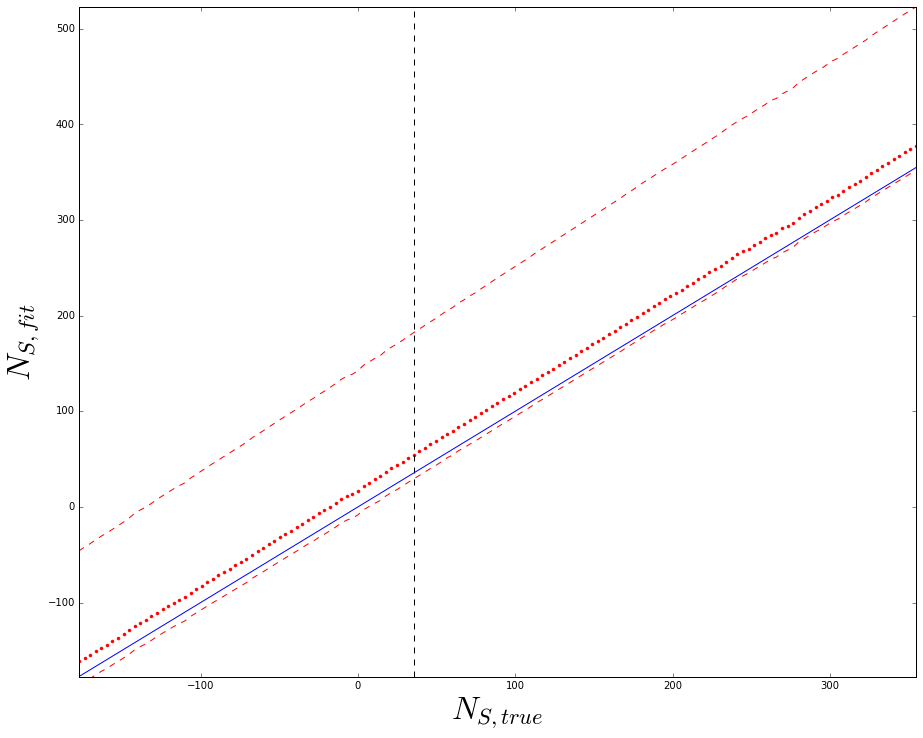

In [47]:
#VBF
idx_top = 0
df_one_top = pd.read_csv(df_agg[idx_top])
plot_NsvNstrue(df_one_top)
plt.savefig("../../output/signalinjection_scan_VBF_agg.pdf", format="pdf", bbox_inches="tight")

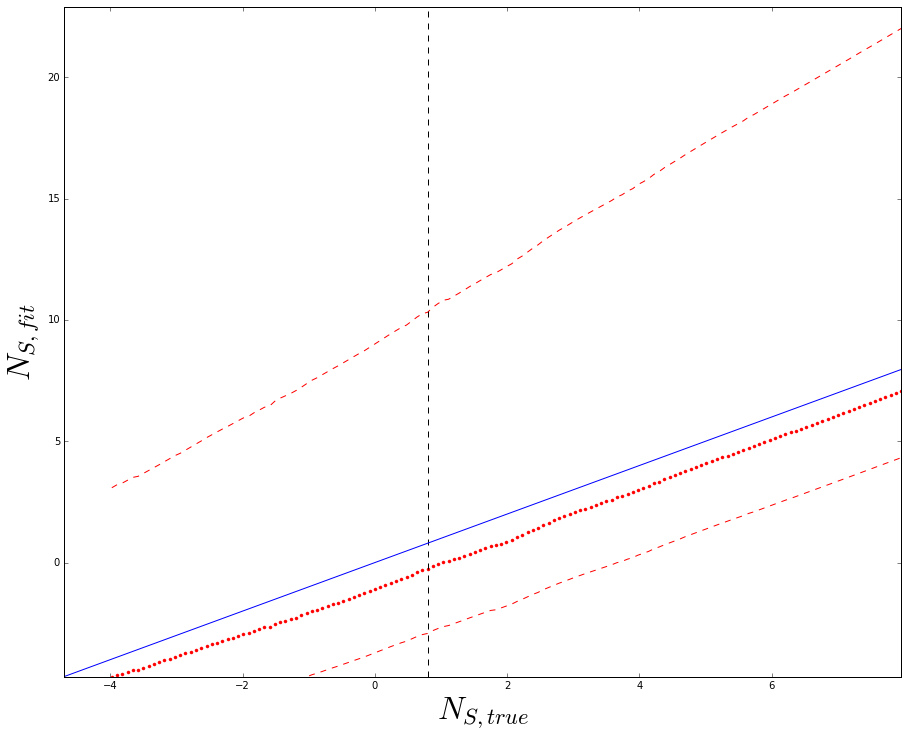

In [48]:
#WH 3l
idx_top = 1
df_one_top = pd.read_csv(df_agg[idx_top])
plot_NsvNstrue(df_one_top)
plt.savefig("../../output/signalinjection_scan_WH_3l_agg.pdf", format="pdf", bbox_inches="tight")

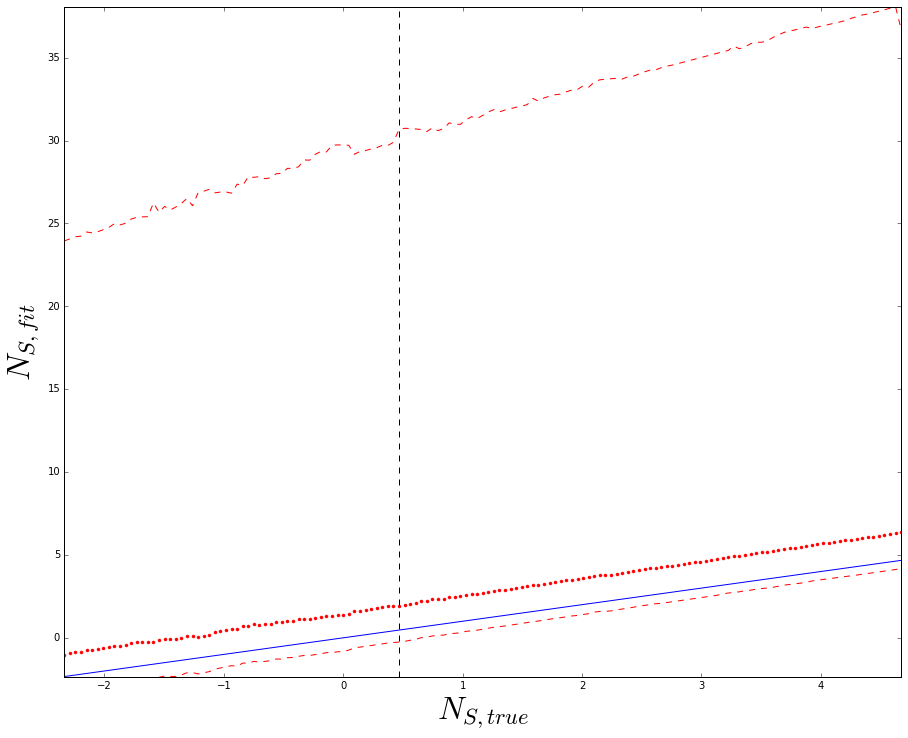

In [49]:
#ZH_MET
idx_top = 2
df_one_top = pd.read_csv(df_agg[idx_top])
plot_NsvNstrue(df_one_top)
plt.savefig("../../output/signalinjection_scan_ZH_MET_agg.pdf", format="pdf", bbox_inches="tight")

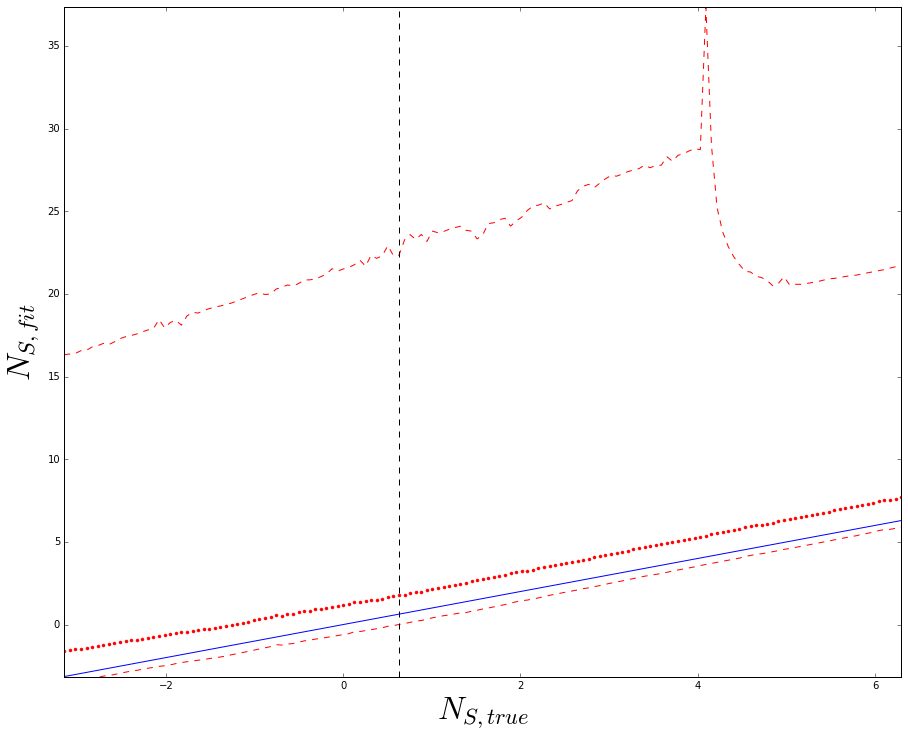

In [50]:
#ttH had
idx_top = 3
df_one_top = pd.read_csv(df_agg[idx_top])
plot_NsvNstrue(df_one_top,True)
plt.savefig("../../output/signalinjection_scan_ttH_had_agg.pdf", format="pdf", bbox_inches="tight")

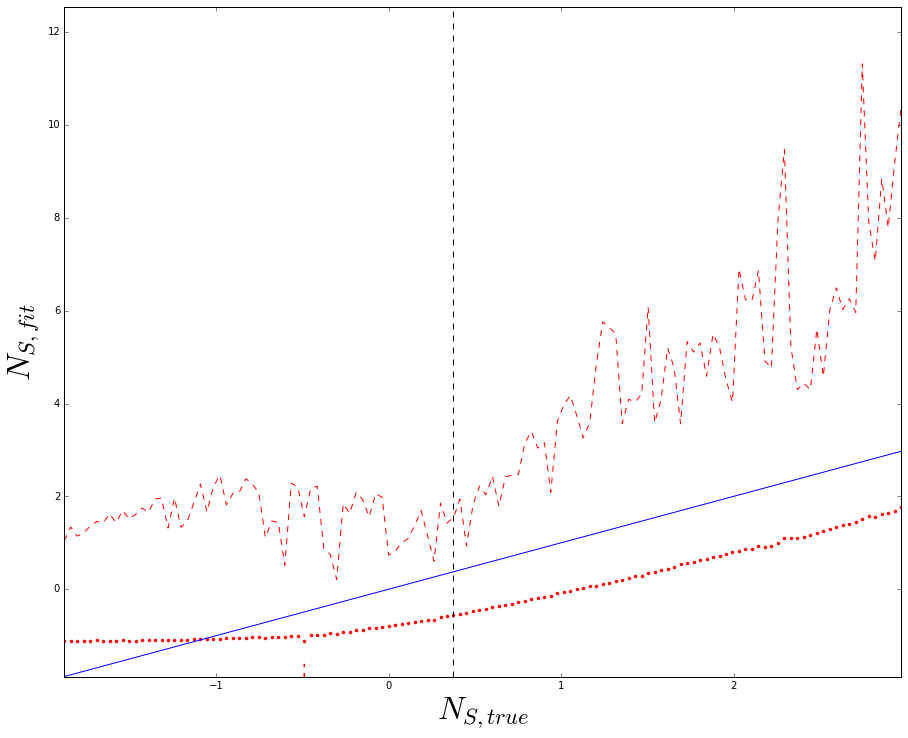

In [51]:
#ttH lep
idx_top = 4
df_one_top = pd.read_csv(df_agg[idx_top])
plot_NsvNstrue(df_one_top[df_one_top['signal_factor']< 8],True)
plt.savefig("../../output/signalinjection_scan_ttH_lep_agg.pdf", format="pdf", bbox_inches="tight")

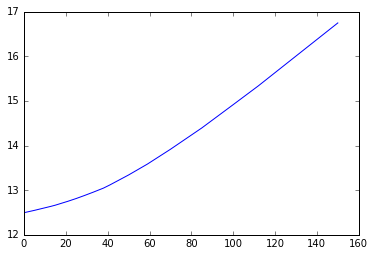

In [43]:
plt.plot(df_one_top['spb_yield'])

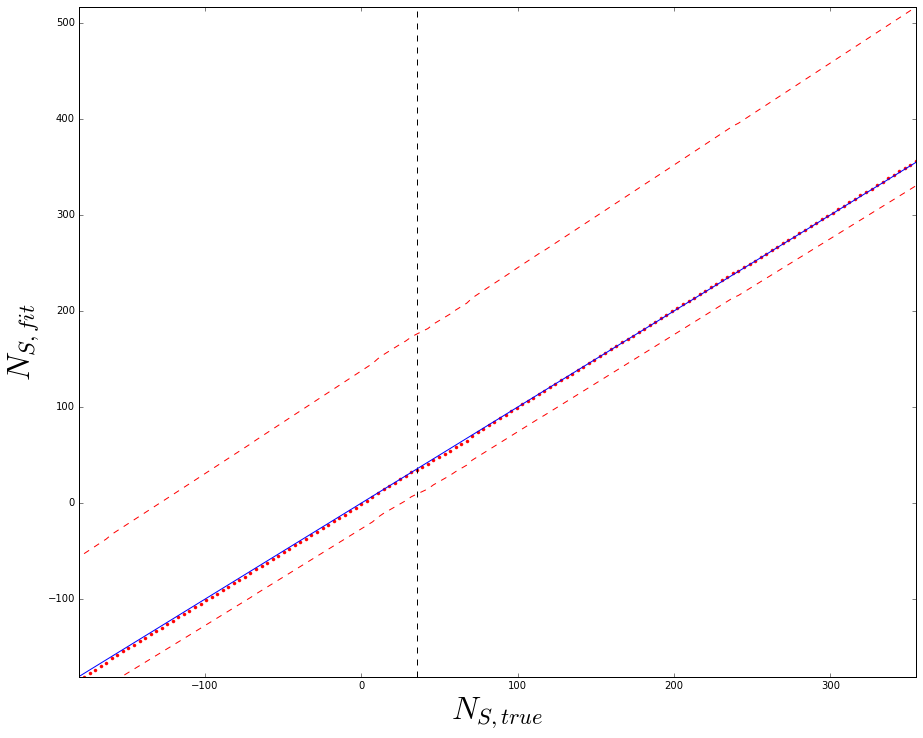

In [52]:
idx_top = 0
df_one_top = pd.read_csv(df_exmg[idx_top])
plot_NsvNstrue(df_one_top)
plt.savefig("../../output/signalinjection_scan_VBF_exmg.pdf", format="pdf", bbox_inches="tight")

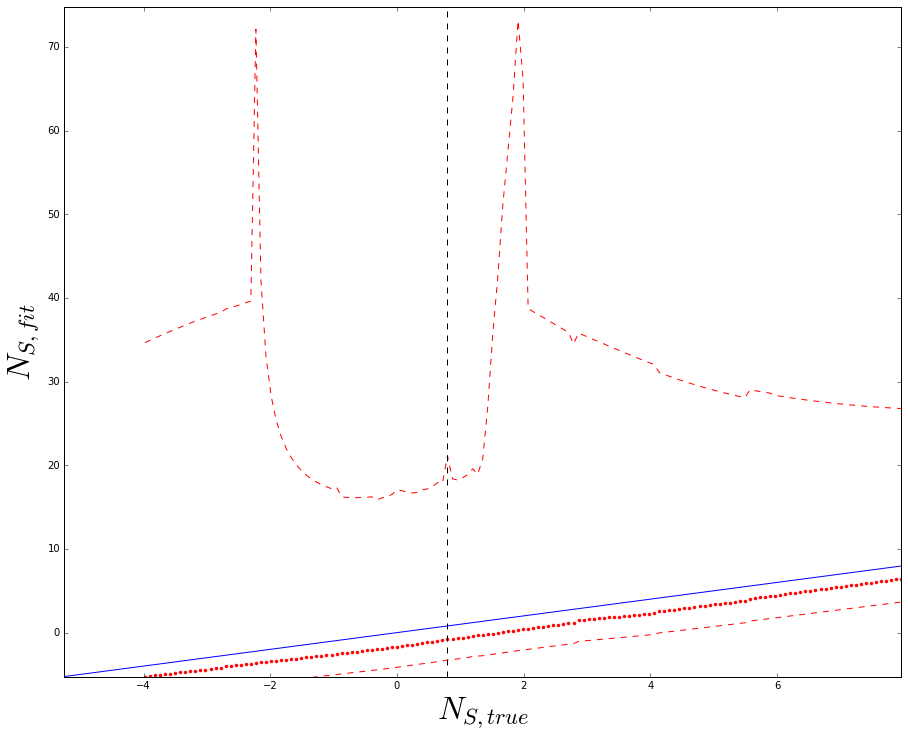

In [53]:
idx_top = 1
df_one_top = pd.read_csv(df_exmg[idx_top])
plot_NsvNstrue(df_one_top)
plt.savefig("../../output/signalinjection_scan_WH_3l_exmg.pdf", format="pdf", bbox_inches="tight")

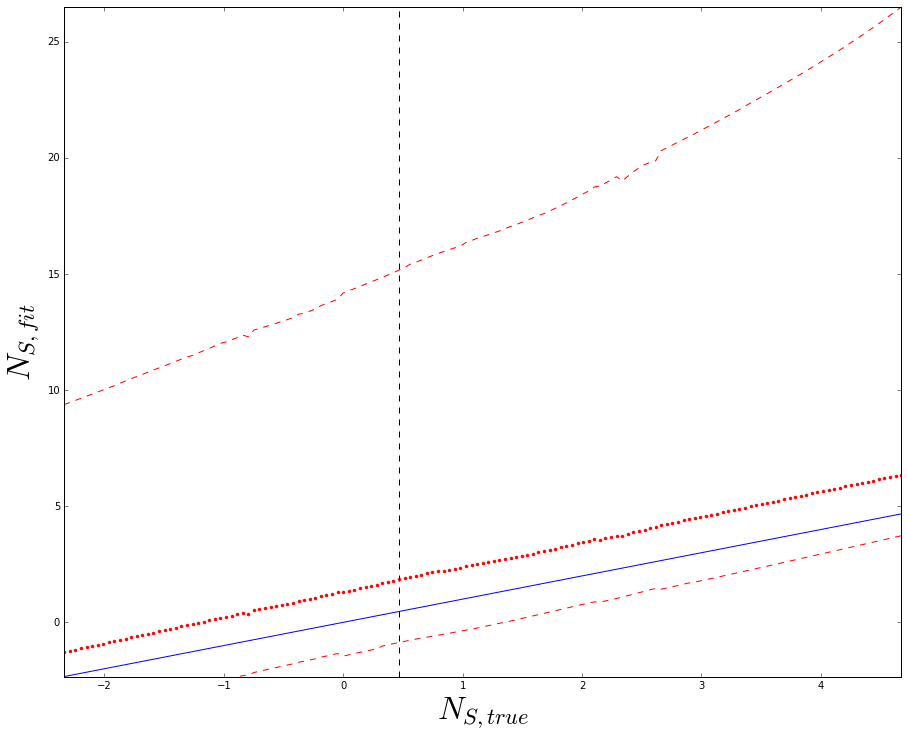

In [54]:
idx_top = 2
df_one_top = pd.read_csv(df_exmg[idx_top])
plot_NsvNstrue(df_one_top)
plt.savefig("../../output/signalinjection_scan_ZH_MET_exmg.pdf", format="pdf", bbox_inches="tight")

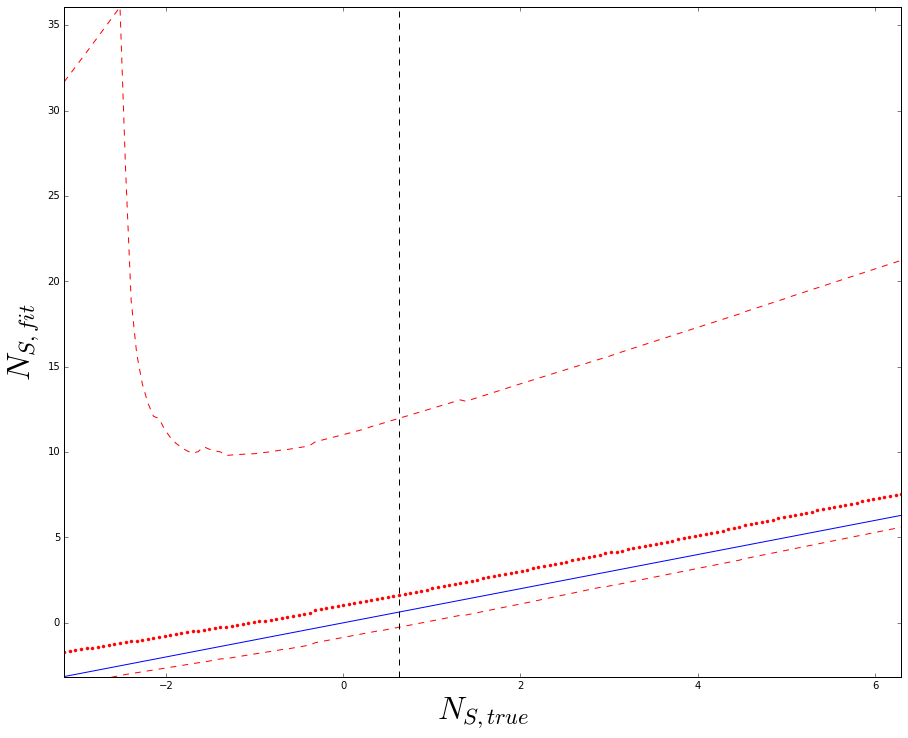

In [55]:
idx_top = 3
df_one_top = pd.read_csv(df_exmg[idx_top])
plot_NsvNstrue(df_one_top)
plt.savefig("../../output/signalinjection_scan_ttH_had_exmg.pdf", format="pdf", bbox_inches="tight")

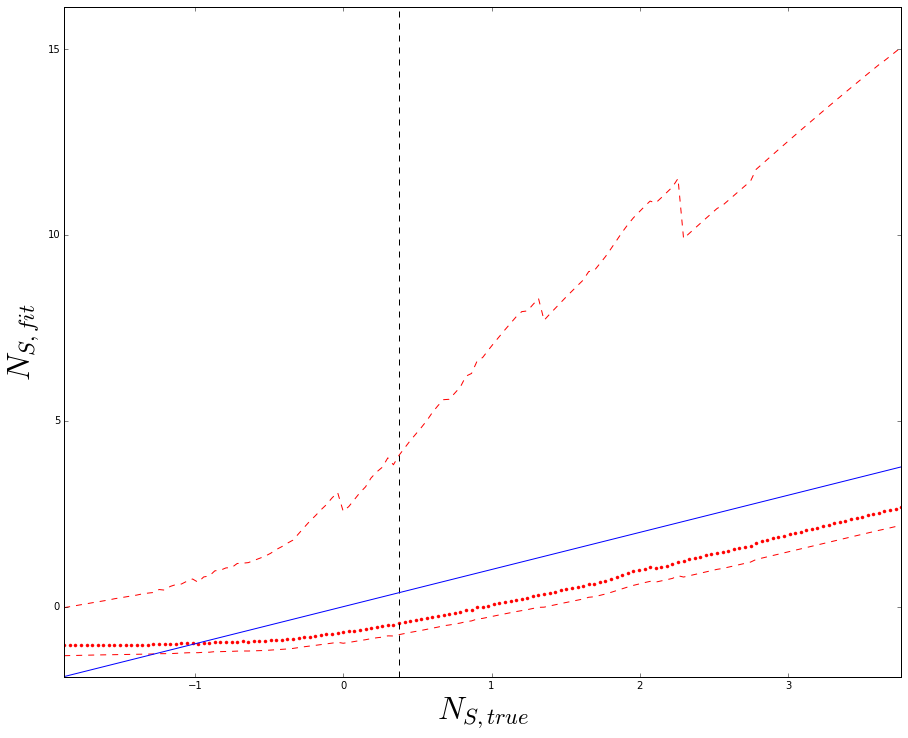

In [56]:
idx_top = 4
df_one_top = pd.read_csv(df_exmg[idx_top])
plot_NsvNstrue(df_one_top)
plt.savefig("../../output/signalinjection_scan_ttH_lep_exmg.pdf", format="pdf", bbox_inches="tight")

In [14]:
idx_top = 5
df_one_top = pd.read_csv(df_exmg[idx_top])
plot_NsvNstrue(df_one_top)

IndexError: list index out of range